# Poissons Equation

In [3]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Define the manufactured solution and its derivative
def u_exact(x):
    return np.sin(np.pi * x)

def f(x):
    return np.pi**2 * np.sin(np.pi * x)

In [5]:
# Create the mesh
num_elements = 4
mesh = IntervalMesh(num_elements, 0, 1)  # 100 equally spaced intervals in [0, 1]

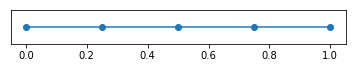

In [6]:
plot(mesh)

In [7]:
# Define the function space
U = FunctionSpace(mesh, "CG", 1)

In [8]:
# Define the boundary conditions
u_D = Constant(0.0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(U, u_D, boundary)

In [9]:
# Define the variational problem
u = TrialFunction(U)
v = TestFunction(U)
f_expr = Expression("pi*pi*sin(pi*x[0])", pi=np.pi, degree=2)  # Define f as an Expression
a = inner(grad(u), grad(v)) * dx
L = f_expr * v * dx

In [10]:
# Compute the solution
u_sol = Function(U)
solve(a == L, u_sol, bc)

In [11]:
points = np.linspace(0,1,100)

# Evaluate the exact solution at the mesh points
u_exact_values = np.array([u_exact(x) for x in points])

# Evaluate the numerical solution at the mesh points
u_numerical_values = np.array([u_sol(x) for x in points])

# Compute the error
error = np.abs(u_exact_values - u_numerical_values).max()

print("Maximum error:", error)

Maximum error: 0.07062846188172611


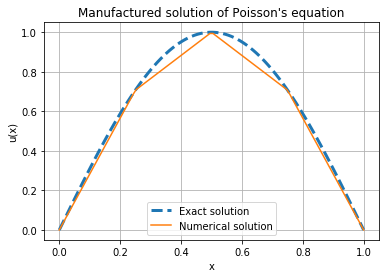

In [12]:

plt.figure()
plt.plot(points, u_exact_values,"--", label='Exact solution',linewidth = 3)
plt.plot(points, u_numerical_values, label='Numerical solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Manufactured solution of Poisson\'s equation')
plt.grid()
plt.show()

In [13]:
!pip install plotly

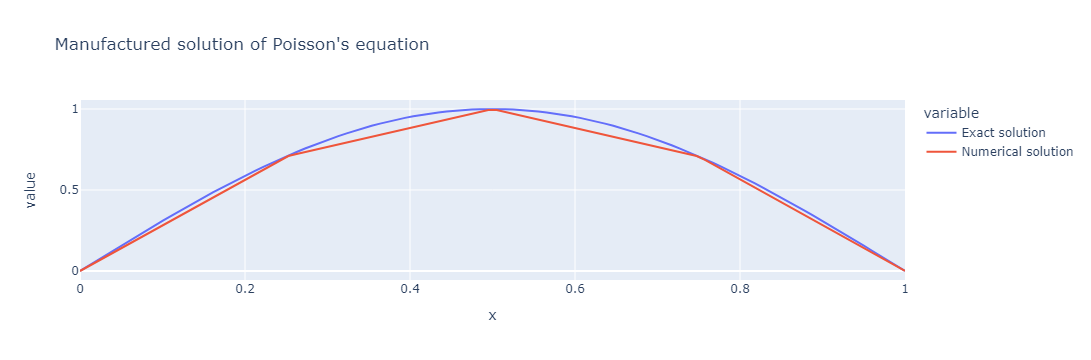

In [16]:
import plotly.express as px

# Convert mesh coordinates and solutions to DataFrame for Plotly Express
import pandas as pd
data = pd.DataFrame({'x': points,
                     'Exact solution': [u_exact(x) for x in points],
                     'Numerical solution': [u_sol(x) for x in points]})

# Create a Plotly Express figure
fig = px.line(data, x='x', y=['Exact solution', 'Numerical solution'], title='Manufactured solution of Poisson\'s equation')

# Show the Plotly Express figure
fig.show()